<a href="https://colab.research.google.com/github/FarahBouattour/knowWhatToEat/blob/main/Regression_Multivari%C3%A9e.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install pycaret

In [28]:
import pandas as pd
from pycaret.regression import *
import plotly.express as px

In [30]:
data = pd.read_csv('reffined_data.csv')

data['Date'] = pd.to_datetime(data['Date'])

fig = px.line(data ,x='Date', y='flux_journalier', template = 'plotly_dark')
fig.add_scatter(x=data['Date'], y=data['CHIRURGIE'], mode='lines', name='chirurgie')
fig.add_scatter(x=data['Date'], y=data['MEDICALE'], mode='lines', name='medicale')
fig.add_scatter(x=data['Date'], y=data['ORTHOPEDIE'], mode='lines', name='orthopedie')
fig.show()

In [31]:
df = pd.read_csv('reffined_data.csv')
df = df.set_index('Date')
df_total = df.drop(['CHIRURGIE',	'MEDICALE',	'ORTHOPEDIE'],axis=1)
df_chirurgie = df.drop(['flux_journalier',	'MEDICALE',	'ORTHOPEDIE'],axis=1)
df_medicale = df.drop(['flux_journalier', 'CHIRURGIE',	'ORTHOPEDIE'],axis=1)
df_orthopedie = df.drop(['flux_journalier', 'CHIRURGIE',	'MEDICALE'],axis=1)

##Feature engineering

####Apply PCA  to correlated data

In [32]:
import pandas as pd

In [33]:
df = pd.read_csv('reffined_data.csv')
#df = pd.read_csv('test_data.csv')

In [34]:
cor = df.corr()
cor.style.background_gradient(cmap='coolwarm')

,flux_journalier,CHIRURGIE,MEDICALE,ORTHOPEDIE,match,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,PRECTOT,QV2M,RH2M,PS,WS50M_RANGE,WS10M_RANGE,WS50M_MIN,WS10M_MIN,WS50M_MAX,WS10M_MAX,WS50M,WS10M,weekday,holidays,season,Ramadan
flux_journalier,1.000000,0.742968,0.856824,0.816638,-0.058636,0.070654,0.046883,0.031832,0.033895,0.068729,0.050207,0.057514,-0.103291,0.048859,-0.080523,0.017583,-0.005788,-0.035318,-0.078543,-0.081064,-0.076021,-0.092369,-0.077869,-0.089067,-0.339115,-0.090597,0.030008,-0.218677
CHIRURGIE,0.742968,1.000000,0.405010,0.511403,0.000931,0.093343,0.194896,0.150920,0.156598,0.202734,0.185513,0.196490,-0.103781,0.163143,-0.159718,-0.043473,0.006072,-0.005141,-0.092518,-0.084021,-0.079581,-0.071867,-0.090781,-0.086471,-0.148557,-0.034401,0.136974,-0.048161
MEDICALE,0.856824,0.405010,1.000000,0.535184,-0.055862,0.036666,-0.160129,-0.138205,-0.140469,-0.128215,-0.148436,-0.143749,-0.066240,-0.122121,0.049188,0.050853,0.007853,-0.029556,-0.013651,-0.026862,-0.006411,-0.044150,-0.003293,-0.030702,-0.321766,-0.112686,-0.123028,-0.237374
ORTHOPEDIE,0.816638,0.511403,0.535184,1.000000,-0.082782,0.053039,0.176217,0.144762,0.148329,0.182885,0.177480,0.180372,-0.090718,0.156896,-0.141861,0.016790,-0.033524,-0.050318,-0.109520,-0.105461,-0.125613,-0.123490,-0.124478,-0.119800,-0.331478,-0.054582,0.130983,-0.216195
match,-0.058636,0.000931,-0.055862,-0.082782,1.000000,-0.007445,-0.087732,-0.082563,-0.081181,-0.087596,-0.090857,-0.089237,0.008472,-0.082270,0.048271,-0.024845,0.016355,0.004650,0.055572,0.053615,0.063227,0.046948,0.057677,0.052116,0.196651,-0.014917,-0.077233,-0.002766
T2M_RANGE,0.070654,0.093343,0.036666,0.053039,-0.007445,1.000000,0.164516,-0.040478,-0.049115,0.345854,0.043015,0.191576,-0.350322,-0.031689,-0.611588,-0.168948,0.175150,0.133397,-0.180927,-0.202302,-0.030226,-0.062690,-0.114536,-0.155354,-0.011058,0.037019,-0.085394,0.113043
TS,0.046883,0.194896,-0.160129,0.176217,-0.087732,0.164516,1.000000,0.926490,0.924690,0.975335,0.985014,0.994075,-0.046881,0.926568,-0.491110,-0.316438,-0.045298,-0.002131,-0.327174,-0.296396,-0.332990,-0.241334,-0.384707,-0.323820,0.003138,0.121828,0.686622,0.174861
T2MDEW,0.031832,0.150920,-0.138205,0.144762,-0.082563,-0.040478,0.926490,1.000000,0.999462,0.884379,0.954835,0.930476,0.067461,0.989907,-0.147141,-0.274687,-0.069494,-0.027656,-0.291883,-0.261846,-0.319425,-0.232692,-0.353928,-0.295165,0.015600,0.086991,0.686436,0.135291
T2MWET,0.033895,0.156598,-0.140469,0.148329,-0.081181,-0.049115,0.924690,0.999462,1.000000,0.880754,0.953785,0.928195,0.070034,0.989490,-0.140070,-0.268738,-0.073338,-0.031606,-0.291636,-0.261121,-0.322156,-0.235097,-0.355502,-0.296204,0.015777,0.086453,0.687164,0.136040
T2M_MAX,0.068729,0.202734,-0.128215,0.182885,-0.087596,0.345854,0.975335,0.884379,0.880754,1.000000,0.952297,0.986256,-0.107821,0.885883,-0.567207,-0.342724,0.004904,0.033149,-0.341780,-0.321267,-0.307700,-0.234744,-0.376266,-0.333147,0.002146,0.116437,0.632136,0.173913


In [35]:
Temp = ['TS',	'T2MDEW',	'T2MWET',	'T2M_MAX',	'T2M_MIN',	'T2M',	'QV2M']
WS_RANG = ['WS50M_RANGE',	'WS10M_RANGE']
WS = ['WS50M',	'WS10M', 'WS50M_MAX',	'WS10M_MAX', 'WS50M_MIN',	'WS10M_MIN']
l = [Temp, WS_RANG, WS]

In [36]:
from sklearn.decomposition import PCA
pca = PCA(n_components=1)

principals = pd.DataFrame(df['Date'])
names = ['Temp', 'WS_RANG', 'WS']
for i in range(len(l)):
  principalComponents = pca.fit_transform(df[l[i]])
  principals.insert(1, names[i], pd.DataFrame(data = principalComponents))

principals.head()

,Date,WS,WS_RANG,Temp
0,2015-01-01,15.003801,3.585058,-26.905337
1,2015-01-02,6.169354,-1.408782,-23.307549
2,2015-01-03,2.128137,-1.542187,-20.511078
3,2015-01-04,5.306430,-3.315347,-18.656676
4,2015-01-05,7.901022,0.765738,-16.650180


In [37]:
for i in range(len(l)):
  df = df.drop(l[i], axis =1)

In [38]:
df = df.merge(principals, on='Date')

In [39]:
df_after_pca = df

In [40]:
cor = df_after_pca.corr()
cor.style.background_gradient(cmap='coolwarm')

,flux_journalier,CHIRURGIE,MEDICALE,ORTHOPEDIE,match,T2M_RANGE,PRECTOT,RH2M,PS,weekday,holidays,season,Ramadan,WS,WS_RANG,Temp
flux_journalier,1.000000,0.742968,0.856824,0.816638,-0.058636,0.070654,-0.103291,-0.080523,0.017583,-0.339115,-0.090597,0.030008,-0.218677,-0.087243,-0.018168,0.051191
CHIRURGIE,0.742968,1.000000,0.405010,0.511403,0.000931,0.093343,-0.103781,-0.159718,-0.043473,-0.148557,-0.034401,0.136974,-0.048161,-0.089890,0.001513,0.187714
MEDICALE,0.856824,0.405010,1.000000,0.535184,-0.055862,0.036666,-0.066240,0.049188,0.050853,-0.321766,-0.112686,-0.123028,-0.237374,-0.019731,-0.007569,-0.145659
ORTHOPEDIE,0.816638,0.511403,0.535184,1.000000,-0.082782,0.053039,-0.090718,-0.141861,0.016790,-0.331478,-0.054582,0.130983,-0.216195,-0.127448,-0.041083,0.174027
match,-0.058636,0.000931,-0.055862,-0.082782,1.000000,-0.007445,0.008472,0.048271,-0.024845,0.196651,-0.014917,-0.077233,-0.002766,0.059474,0.011768,-0.088629
T2M_RANGE,0.070654,0.093343,0.036666,0.053039,-0.007445,1.000000,-0.350322,-0.611588,-0.168948,-0.011058,0.037019,-0.085394,0.113043,-0.120337,0.160788,0.127146
PRECTOT,-0.103291,-0.103781,-0.066240,-0.090718,0.008472,-0.350322,1.000000,0.315149,-0.105352,0.039651,-0.026905,0.064096,-0.063714,0.102586,0.056515,-0.019122
RH2M,-0.080523,-0.159718,0.049188,-0.141861,0.048271,-0.611588,0.315149,1.000000,0.251479,0.029341,-0.105422,-0.224878,-0.132595,0.166436,-0.096873,-0.403560
PS,0.017583,-0.043473,0.050853,0.016790,-0.024845,-0.168948,-0.105352,0.251479,1.000000,-0.016456,-0.019559,-0.226651,-0.096112,-0.214905,-0.332175,-0.317537
weekday,-0.339115,-0.148557,-0.321766,-0.331478,0.196651,-0.011058,0.039651,0.029341,-0.016456,1.000000,0.028227,-0.000819,-0.006550,-0.013385,-0.011542,0.007204


In [41]:
#df_after_pca_total = df_after_pca.drop(['CHIRURGIE',	'MEDICALE',	'ORTHOPEDIE'], axis=1)

forecast period = 31\
train data size = 2161\
MAPE
- forecast with df_total (pca = true ): Bayesian Ridge	**26.67%** and **93.34%**
- forecast with df_after_pca_total : Random Forest Regressor **23.74%** and **89.63%**


####Datetime features

In [ ]:
import pandas as pd
df = pd.read_csv('reffined_data.csv')
#df = pd.read_csv('test_data.csv')
df.head()

,Date,flux_journalier,CHIRURGIE,MEDICALE,ORTHOPEDIE,match,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,PRECTOT,QV2M,RH2M,PS,WS50M_RANGE,WS10M_RANGE,WS50M_MIN,WS10M_MIN,WS50M_MAX,WS10M_MAX,WS50M,WS10M,weekday,holidays,season,Ramadan
0,2015-01-01,170,47.0,75,48.0,0,6.90,10.57,4.34,4.35,11.65,4.75,8.18,2.42,5.17,77.70,101.82,7.62,6.29,8.34,6.93,15.97,13.22,12.74,10.57,3,1,1,0
1,2015-01-02,249,56.0,111,82.0,0,5.82,11.55,5.22,5.23,13.22,7.40,9.96,0.16,5.44,72.93,102.61,3.91,2.94,6.80,5.67,10.71,8.61,8.35,6.64,4,1,1,0
2,2015-01-03,222,104.0,73,45.0,0,8.26,12.09,6.62,6.63,15.72,7.46,10.91,0.02,5.98,75.49,102.93,3.77,2.90,4.93,3.77,8.71,6.67,7.13,5.60,5,0,1,0
3,2015-01-04,228,92.0,81,55.0,0,11.28,12.73,5.97,5.98,18.93,7.65,12.31,0.01,5.83,66.70,102.27,2.04,2.21,7.46,5.27,9.50,7.47,8.64,6.35,6,0,1,0
4,2015-01-05,303,83.0,139,81.0,0,6.54,12.97,8.43,8.43,16.46,9.92,12.68,0.17,6.81,75.91,102.18,5.07,4.95,6.72,5.06,11.79,10.00,9.64,7.43,0,0,1,0


In [ ]:
import datetime as dt
df['Date'] = pd.to_datetime(df['Date'])
df.loc[:, 'year'] = df['Date'].dt.year
df.loc[:, 'month'] = df['Date'].dt.month
#df.loc[:, 'week'] = df['Date'].dt.week
df.loc[:, 'day'] = df['Date'].dt.day
df.loc[:, 'weekend'] = (df.Date.dt.weekday >=5).astype(int)
datetime_features = df[['Date', 'year',	'month',	'day',	'weekend']]
datetime_features

,Date,year,month,day,weekend
0,2015-01-01,2015,1,1,0
1,2015-01-02,2015,1,2,0
2,2015-01-03,2015,1,3,1
3,2015-01-04,2015,1,4,1
4,2015-01-05,2015,1,5,0
...,...,...,...,...,...
2187,2020-12-27,2020,12,27,1
2188,2020-12-28,2020,12,28,0
2189,2020-12-29,2020,12,29,0
2190,2020-12-30,2020,12,30,0


In [ ]:
df_pca_dtf = pd.concat([df_after_pca, datetime_features], axis=1)
dt_dtf = pd.concat([df, datetime_features], axis = 1)

In [ ]:
#df_pca_dtf = df_pca_dtf.drop(['CHIRURGIE',	'MEDICALE',	'ORTHOPEDIE'], axis =  1)
#dt_dtf = dt_dtf.drop(['CHIRURGIE',	'MEDICALE',	'ORTHOPEDIE'], axis =  1)

forecast period = 31\
train data size = 2161\
MAPE
- forecast with df_pca_dtf (data after pca + datetime features ): Extra Trees Regressor	**17.46%** and **117.54%**
- forecast with dt_dtf (original data + datetime features) : Extra Trees Regressor **17.69%** and **118.25%**


####Polynomial features

In [ ]:
data = pd.read_csv('reffined_data.csv')

,Date,flux_journalier,CHIRURGIE,MEDICALE,ORTHOPEDIE,match,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,PRECTOT,QV2M,RH2M,PS,WS50M_RANGE,WS10M_RANGE,WS50M_MIN,WS10M_MIN,WS50M_MAX,WS10M_MAX,WS50M,WS10M,weekday,holidays,season,Ramadan
0,2015-01-01,170,47.0,75,48.0,0,6.90,10.57,4.34,4.35,11.65,4.75,8.18,2.42,5.17,77.70,101.82,7.62,6.29,8.34,6.93,15.97,13.22,12.74,10.57,3,1,1,0
1,2015-01-02,249,56.0,111,82.0,0,5.82,11.55,5.22,5.23,13.22,7.40,9.96,0.16,5.44,72.93,102.61,3.91,2.94,6.80,5.67,10.71,8.61,8.35,6.64,4,1,1,0
2,2015-01-03,222,104.0,73,45.0,0,8.26,12.09,6.62,6.63,15.72,7.46,10.91,0.02,5.98,75.49,102.93,3.77,2.90,4.93,3.77,8.71,6.67,7.13,5.60,5,0,1,0
3,2015-01-04,228,92.0,81,55.0,0,11.28,12.73,5.97,5.98,18.93,7.65,12.31,0.01,5.83,66.70,102.27,2.04,2.21,7.46,5.27,9.50,7.47,8.64,6.35,6,0,1,0
4,2015-01-05,303,83.0,139,81.0,0,6.54,12.97,8.43,8.43,16.46,9.92,12.68,0.17,6.81,75.91,102.18,5.07,4.95,6.72,5.06,11.79,10.00,9.64,7.43,0,0,1,0


In [ ]:
data = data.drop(['Date', 'match', 'flux_journalier', 'CHIRURGIE', 'MEDICALE', 'ORTHOPEDIE', 'weekday', 'holidays',	'season',	'Ramadan'], axis=1)


In [ ]:
covid_data = pd.read_csv('covid_data.csv')
data = pd.concat([data, covid_data], axis = 1)

In [ ]:
data = data.drop(['Date'], axis = 1)

In [ ]:
data.head()

,T2M_RANGE,TS,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M,PRECTOT,QV2M,RH2M,PS,WS50M_RANGE,WS10M_RANGE,WS50M_MIN,WS10M_MIN,WS50M_MAX,WS10M_MAX,WS50M,WS10M,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_vaccinations_smoothed_per_million,stringency_index,excess_mortality
0,6.90,10.57,4.34,4.35,11.65,4.75,8.18,2.42,5.17,77.70,101.82,7.62,6.29,8.34,6.93,15.97,13.22,12.74,10.57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,5.82,11.55,5.22,5.23,13.22,7.40,9.96,0.16,5.44,72.93,102.61,3.91,2.94,6.80,5.67,10.71,8.61,8.35,6.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,8.26,12.09,6.62,6.63,15.72,7.46,10.91,0.02,5.98,75.49,102.93,3.77,2.90,4.93,3.77,8.71,6.67,7.13,5.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,11.28,12.73,5.97,5.98,18.93,7.65,12.31,0.01,5.83,66.70,102.27,2.04,2.21,7.46,5.27,9.50,7.47,8.64,6.35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6.54,12.97,8.43,8.43,16.46,9.92,12.68,0.17,6.81,75.91,102.18,5.07,4.95,6.72,5.06,11.79,10.00,9.64,7.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly.fit(data)
poly_feats = poly.transform(data)
# create a dataframe with all the features
num_feats = poly_feats.shape[1]
df_transformed = pd.DataFrame(
poly_feats,
columns=[f"f_{i}" for i in range(1, num_feats + 1)]
)
df_transformed

,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,f_9,f_10,f_11,f_12,f_13,f_14,f_15,f_16,f_17,f_18,f_19,f_20,f_21,f_22,f_23,f_24,f_25,f_26,f_27,f_28,f_29,f_30,f_31,f_32,f_33,f_34,f_35,f_36,f_37,f_38,f_39,f_40,f_41,f_42,f_43,f_44,f_45,f_46,f_47,f_48,f_49,f_50,f_51,f_52,f_53,f_54,f_55,f_56,f_57,f_58,f_59,f_60,f_61,f_62,f_63,f_64,f_65,f_66,f_67,f_68,f_69,f_70,f_71,f_72,f_73,f_74,f_75,f_76,f_77,f_78,f_79,f_80,f_81,f_82,f_83,f_84,f_85,f_86,f_87,f_88,f_89,f_90,f_91,f_92,f_93,f_94,f_95,f_96,f_97,f_98,f_99,f_100,f_101,f_102,f_103,f_104,f_105,f_106,f_107,f_108,f_109,f_110,f_111,f_112,f_113,f_114,f_115,f_116,f_117,f_118,f_119,f_120,f_121,f_122,f_123,f_124,f_125,f_126,f_127,f_128,f_129,f_130,f_131,f_132,f_133,f_134,f_135,f_136,f_137,f_138,f_139,f_140,f_141,f_142,f_143,f_144,f_145,f_146,f_147,f_148,f_149,f_150,f_151,f_152,f_153,f_154,f_155,f_156,f_157,f_158,f_159,f_160,f_161,f_162,f_163,f_164,f_165,f_166,f_167,f_168,f_169,f_170,f_171,f_172,f_173,f_174,f_175,f_176,f_177,f_178,f_179,f_180,f_181,f_182,f_183,f_184,f_185,f_186,f_187,f_188,f_189,f_190,f_191,f_192,f_193,f_194,f_195,f_196,f_197,f_198,f_199,f_200,f_201,f_202,f_203,f_204,f_205,f_206,f_207,f_208,f_209,f_210,f_211,f_212,f_213,f_214,f_215,f_216,f_217,f_218,f_219,f_220,f_221,f_222,f_223,f_224,f_225,f_226,f_227,f_228,f_229,f_230,f_231,f_232,f_233,f_234,f_235,f_236,f_237,f_238,f_239,f_240,f_241,f_242,f_243,f_244,f_245,f_246,f_247,f_248,f_249,f_250,...,f_380,f_381,f_382,f_383,f_384,f_385,f_386,f_387,f_388,f_389,f_390,f_391,f_392,f_393,f_394,f_395,f_396,f_397,f_398,f_399,f_400,f_401,f_402,f_403,f_404,f_405,f_406,f_407,f_408,f_409,f_410,f_411,f_412,f_413,f_414,f_415,f_416,f_417,f_418,f_419,f_420,f_421,f_422,f_423,f_424,f_425,f_426,f_427,f_428,f_429,f_430,f_431,f_432,f_433,f_434,f_435,f_436,f_437,f_438,f_439,f_440,f_441,f_442,f_443,f_444,f_445,f_446,f_447,f_448,f_449,f_450,f_451,f_452,f_453,f_454,f_455,f_456,f_457,f_458,f_459,f_460,f_461,f_462,f_463,f_464,f_465,f_466,f_467,f_468,f_469,f_470,f_471,f_472,f_473,f_474,f_475,f_476,f_477,f_478,f_479,f_480,f_481,f_482,f_483,f_484,f_485,f_486,f_487,f_488,f_489,f_490,f_491,f_492,f_493,f_494,f_495,f_496,f_497,f_498,f_499,f_500,f_501,f_502,f_503,f_504,f_505,f_506,f_507,f_508,f_509,f_510,f_511,f_512,f_513,f_514,f_515,f_516,f_517,f_518,f_519,f_520,f_521,f_522,f_523,f_524,f_525,f_526,f_527,f_528,f_529,f_530,f_531,f_532,f_533,f_534,f_535,f_536,f_537,f_538,f_539,f_540,f_541,f_542,f_543,f_544,f_545,f_546,f_547,f_548,f_549,f_550,f_551,f_552,f_553,f_554,f_555,f_556,f_557,f_558,f_559,f_560,f_561,f_562,f_563,f_564,f_565,f_566,f_567,f_568,f_569,f_570,f_571,f_572,f_573,f_574,f_575,f_576,f_577,f_578,f_579,f_580,f_581,f_582,f_583,f_584,f_585,f_586,f_587,f_588,f_589,f_590,f_591,f_592,f_593,f_594,f_595,f_596,f_597,f_598,f_599,f_600,f_601,f_602,f_603,f_604,f_605,f_606,f_607,f_608,f_609,f_610,f_611,f_612,f_613,f_614,f_615,f_616,f_617,f_618,f_619,f_620,f_621,f_622,f_623,f_624,f_625,f_626,f_627,f_628,f_629
0,6.90,10.57,4.34,4.35,11.65,4.75,8.18,2.42,5.17,77.70,101.82,7.62,6.29,8.34,6.93,15.97,13.22,12.74,10.57,0.0,0.0,0.000,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.00,0.0,0.00,47.6100,72.9330,29.9460,30.0150,80.3850,32.7750,56.4420,16.6980,35.6730,536.1300,702.5580,52.5780,43.4010,57.5460,47.8170,110.1930,91.2180,87.9060,72.9330,0.00,0.00,0.00000,0.00,0.00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.000,0.0000,111.7249,45.8738,45.9795,123.1405,50.2075,86.4626,25.5794,54.6469,821.2890,1076.2374,80.5434,66.4853,88.1538,73.2501,168.8029,139.7354,134.6618,111.7249,0.00,0.00,0.00000,0.00,0.00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.000,0.0000,18.8356,18.8790,50.5610,20.6150,35.5012,10.5028,22.4378,337.2180,441.8988,33.0708,27.2986,36.1956,30.0762,69.3098,57.3748,55.2916,45.8738,0.00,0.00,0.00000,0.00,0.00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0000,0.000,0.0000,18.9225,50.6775,20.6625,35.5830,10.5270,22.4895,337.9950,442.9170,33.1470,27.3615,36.2790,30.1455,69.4695,57.5070,55.4190,45.9795,0.00,0.00,0.00000,0.00,0.00,0.0

####Feature importance

In [ ]:
covid_data = pd.read_csv('covid_data.csv')
#covid_data = pd.read_csv('covid_test_data.csv')

df = pd.concat([df_after_pca, datetime_features, covid_data], axis = 1)
df = df.drop('Date', axis = 1)
df = df.set_index(covid_data['Date'])

In [ ]:
df.head()

,flux_journalier,CHIRURGIE,MEDICALE,ORTHOPEDIE,match,T2M_RANGE,PRECTOT,RH2M,PS,weekday,holidays,season,Ramadan,WS,WS_RANG,Temp,year,month,day,weekend,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_vaccinations_smoothed_per_million,stringency_index,excess_mortality
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-01-01,112.0,35.0,40.0,37.0,1.0,5.96,0.0,62.87,100.96,4.0,1.0,1.0,0.0,0.643467,-2.540361,-17.941538,2021.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-02,147.0,26.0,72.0,49.0,0.0,8.02,0.0,58.45,100.78,5.0,0.0,1.0,0.0,2.773686,-3.868531,-17.723206,2021.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-03,135.0,36.0,69.0,30.0,0.0,6.45,0.0,62.95,100.95,6.0,0.0,1.0,0.0,1.935177,-0.960396,-17.563890,2021.0,1.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-04,163.0,27.0,68.0,68.0,0.0,7.09,0.0,58.87,101.12,0.0,0.0,1.0,0.0,3.701725,-1.157312,-22.099641,2021.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2015-01-05,137.0,20.0,67.0,50.0,0.0,6.62,0.0,55.58,101.14,1.0,0.0,1.0,0.0,3.402710,-1.959483,-22.175979,2021.0,1.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df.shape

(2192, 35)

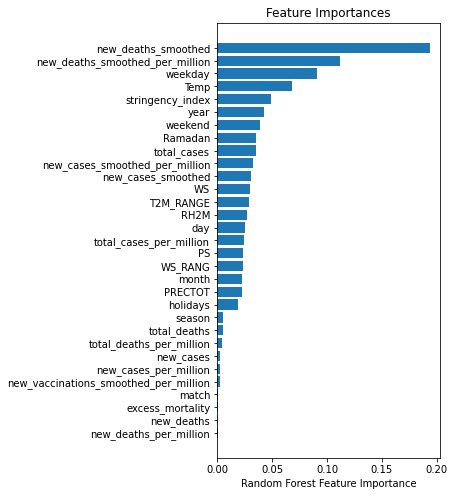

In [ ]:
from sklearn.datasets import load_diabetes
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt

X = df.iloc[:,4:]
col_names = X.columns
y = df.iloc[:,:4]
# initialize the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)

importances = model.feature_importances_
idxs = np.argsort(importances)
plt.figure(figsize=(4,8))
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

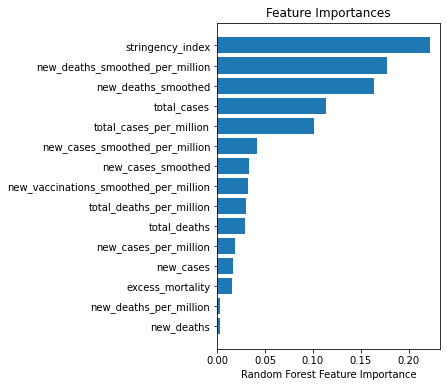

In [ ]:
data = covid_data.set_index('Date')
X = data.iloc[1826:,:]
col_names = X.columns
y = df.iloc[1826:,:4]
# initialize the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)

importances = model.feature_importances_
idxs = np.argsort(importances)
plt.figure(figsize=(4,6))
plt.title('Feature Importances')
plt.barh(range(len(idxs)), importances[idxs], align='center')
plt.yticks(range(len(idxs)), [col_names[i] for i in idxs])
plt.xlabel('Random Forest Feature Importance')
plt.show()

In [ ]:
df = df.drop(['excess_mortality', 
         'new_deaths', 
         'new_deaths_per_million',
         'new_cases', 
         'new_cases_per_million'], axis = 1)

In [ ]:
#df.to_csv('data_pca_dt_covid_fi.csv', index=False)
df.to_csv('test_data_pca_dt_covid_fi.csv', index=False)

####feature selection

In [ ]:
import pandas as pd
df = pd.read_csv('data_pca_dt_covid_fi.csv')

In [ ]:
df.shape

(2192, 30)

In [ ]:
X = df.iloc[:,4:]
y = df.iloc[:,:4]
print('We have ', X.shape[1], '  Features and ', y.shape[1], 'Targets')

We have  26   Features and  4 Targets


In [ ]:
#!pip install -U scikit-learn

In [ ]:
import sklearn
print(sklearn.__version__)

0.24.2


Greedy feature selection

In [ ]:
import pandas as pd
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor

class GreedyFeatureSelection:
  def evaluate_score(self, X, y):
    model = RandomForestRegressor()
    model.fit(X, y)
    predictions = model.predict(X)
    mape = mean_absolute_percentage_error(y, predictions)
    return mape

  def _feature_selection(self, X, y):
    good_features = []
    best_scores = []
    # calculate the number of features
    num_features = X.shape[1]

    # infinite loop
    while True:
    # initialize best feature and score of this loop
      this_feature = None
      best_score = 0
      # loop over all features
      for feature in range(num_features):
        # if feature is already in good features, skip this for loop
        if feature in good_features:
          continue
        # selected features are all good features till now and current feature
        selected_features = good_features + [feature]
        # remove all other features from data
        xtrain = X.iloc[:, selected_features]
        # calculate the score, in our case, MAPE
        score = self.evaluate_score(xtrain, y)
        # if score is greater than the best score of this loop, change best score and best feature
        if score > best_score:
          this_feature = feature
          best_score = score
      # if we have selected a feature, add it to the good feature list and update best scores list
      if this_feature != None:
        good_features.append(this_feature)
        best_scores.append(best_score)

      # if we didnt improve during the last two rounds, exit the while loop 
      if len(best_scores) == (num_features - 1):
        #if best_scores[-1] < best_scores[-2]:
        break
    # return best scores and good features
    return best_scores[:-1], good_features[:-1]

  def __call__(self, X, y):
    # select features, return scores and selected indices
    scores, features = self._feature_selection(X, y)
    # transform data with selected features
    return X.iloc[:, features], scores

if __name__ == "__main__":
  # transform data by greedy feature selection
  X_transformed, scores = GreedyFeatureSelection()(X, y)

In [ ]:
X_transformed

,match,holidays,Ramadan,season,month,weekend,weekday,PRECTOT,day,WS_RANG,PS,WS,Temp,T2M_RANGE,RH2M,new_vaccinations_smoothed_per_million,year,total_deaths,new_cases_smoothed_per_million,new_cases_smoothed,total_cases,total_cases_per_million,new_deaths_smoothed,total_deaths_per_million
0,0,1,0,1,1,0,3,2.42,1,3.585058,101.82,15.003801,-26.905337,6.90,77.70,0.00,2015,0.0,0.000,0.000,0.0,0.000,0.000,0.000
1,0,1,0,1,1,0,4,0.16,2,-1.408782,102.61,6.169354,-23.307549,5.82,72.93,0.00,2015,0.0,0.000,0.000,0.0,0.000,0.000,0.000
2,0,0,0,1,1,1,5,0.02,3,-1.542187,102.93,2.128137,-20.511078,8.26,75.49,0.00,2015,0.0,0.000,0.000,0.0,0.000,0.000,0.000
3,0,0,0,1,1,1,6,0.01,4,-3.315347,102.27,5.306430,-18.656676,11.28,66.70,0.00,2015,0.0,0.000,0.000,0.0,0.000,0.000,0.000
4,0,0,0,1,1,0,0,0.17,5,0.765738,102.18,7.901022,-16.650180,6.54,75.91,0.00,2015,0.0,0.000,0.000,0.0,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,0,0,0,1,12,1,6,0.61,27,-1.392326,101.01,6.381007,-22.257272,5.65,70.97,1.12,2020,4466.0,131.814,1557.857,131592.0,11134.297,44.000,377.878
2188,2,0,0,1,12,0,0,0.00,28,3.447033,100.52,15.684082,-25.058027,5.89,60.57,1.13,2020,4518.0,138.837,1640.857,133204.0,11270.692,45.571,382.278
2189,0,0,0,1,12,0,1,0.00,29,-2.070119,100.43,8.207641,-22.269989,7.68,64.66,1.13,2020,4570.0,138.752,1639.857,134802.0,11405.902,47.571,386.678
2190,0,0,0,1,12,0,2,0.01,30,-1.437650,100.73,2.832151,-20.456945,8.81,67.05,1.13,2020,4620.0,147.660,1745.143,137216.0,11610.156,49.286,390.909


In [ ]:
scores

[0.33223978974218715,
 0.32994020707953153,
 0.3231155845650794,
 0.31529139851610544,
 0.3037704335927402,
 0.2898187642986741,
 0.27720765661564756,
 0.1665067556557972,
 0.11691346846072456,
 0.11013493349944342,
 0.10962815276755876,
 0.10917276724966614,
 0.10767541799701068,
 0.10647476813826351,
 0.10675446417994236,
 0.06465702209163687,
 0.060603708793287234,
 0.05713224289349707,
 0.05584443545728131,
 0.05600196897791264,
 0.05609457249617991,
 0.05609527276369053,
 0.055469477146566123,
 0.055155084657639644]

In [ ]:
X_20 = X.iloc[1826:]
y_20 = y.iloc[1826:] 
X_transformed_20, scores_20 = GreedyFeatureSelection()(X_20, y_20)

In [ ]:
X_transformed_20

,weekend,year,holidays,match,weekday,Ramadan,day,PS,WS,WS_RANG,PRECTOT,T2M_RANGE,RH2M,new_vaccinations_smoothed_per_million,new_cases_smoothed_per_million,new_cases_smoothed,season,stringency_index,month,Temp,total_deaths,new_deaths_smoothed_per_million,total_cases_per_million,new_deaths_smoothed
1826,0,2020,1,0,2,0,1,102.51,4.994999,-1.727532,0.06,5.64,73.87,0.00,0.000,0.000,1,0.0,1,-21.667681,0.0,0.000,0.000,0.000
1827,0,2020,0,0,3,0,2,102.62,-0.389975,0.340622,0.17,6.29,73.50,0.00,0.000,0.000,1,0.0,1,-19.568022,0.0,0.000,0.000,0.000
1828,0,2020,0,0,4,0,3,102.54,-7.893553,-1.340057,0.00,7.81,63.59,0.00,0.000,0.000,1,0.0,1,-22.492523,0.0,0.000,0.000,0.000
1829,1,2020,0,0,5,0,4,102.31,-1.438453,-2.152622,0.05,7.56,72.57,0.00,0.000,0.000,1,0.0,1,-20.397996,0.0,0.000,0.000,0.000
1830,1,2020,0,0,6,0,5,102.07,5.979509,-2.391193,0.62,5.80,77.20,0.00,0.000,0.000,1,0.0,1,-16.289347,0.0,0.000,0.000,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,1,2020,0,0,6,0,27,101.01,6.381007,-1.392326,0.61,5.65,70.97,1.12,131.814,1557.857,1,71.3,12,-22.257272,4466.0,3.723,11134.297,44.000
2188,0,2020,0,2,0,0,28,100.52,15.684082,3.447033,0.00,5.89,60.57,1.13,138.837,1640.857,1,71.3,12,-25.058027,4518.0,3.856,11270.692,45.571
2189,0,2020,0,0,1,0,29,100.43,8.207641,-2.070119,0.00,7.68,64.66,1.13,138.752,1639.857,1,71.3,12,-22.269989,4570.0,4.025,11405.902,47.571
2190,0,2020,0,0,2,0,30,100.73,2.832151,-1.437650,0.01,8.81,67.05,1.13,147.660,1745.143,1,71.3,12,-20.456945,4620.0,4.170,11610.156,49.286


In [ ]:
scores_20

[0.7116544180924219,
 0.7090541600351372,
 0.7087150252202004,
 0.7051931199116697,
 0.6920079526109583,
 0.6799009672115421,
 0.4363337324385489,
 0.2648229150402732,
 0.22499370046367712,
 0.22566659621144655,
 0.21455601964821816,
 0.21420118736450694,
 0.1917568390124976,
 0.17015401026201718,
 0.1426831003098459,
 0.14762012599759922,
 0.10839450472166962,
 0.10726063239676996,
 0.10794071134557687,
 0.10106884952637823,
 0.10058591314869456,
 0.0975900441744398,
 0.09568526598126004,
 0.09420946800774807]

**RFE**: Recursive Feature Elimination \
In RFE, we start with all features and keep removing one feature in every iteration that
provides the least value to a given model.

In [ ]:
from sklearn.feature_selection import RFE

model = RandomForestRegressor()

# initialize RFE
rfe = RFE(estimator=model, n_features_to_select=20)

# fit RFE
rfe.fit(X, y)

# get the transformed data with selected columns
X_transformed_RFE = rfe.transform(X)

In [ ]:
X_transformed_RFE
rfe = pd.DataFrame(X_transformed_RFE)
rfe

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,6.90,2.42,77.70,101.82,3.0,0.0,15.003801,3.585058,-26.905337,2015.0,1.0,1.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0
1,5.82,0.16,72.93,102.61,4.0,0.0,6.169354,-1.408782,-23.307549,2015.0,1.0,2.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0
2,8.26,0.02,75.49,102.93,5.0,0.0,2.128137,-1.542187,-20.511078,2015.0,1.0,3.0,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0
3,11.28,0.01,66.70,102.27,6.0,0.0,5.306430,-3.315347,-18.656676,2015.0,1.0,4.0,1.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0
4,6.54,0.17,75.91,102.18,0.0,0.0,7.901022,0.765738,-16.650180,2015.0,1.0,5.0,0.0,0.0,0.000,0.000,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2187,5.65,0.61,70.97,101.01,6.0,0.0,6.381007,-1.392326,-22.257272,2020.0,12.0,27.0,1.0,131592.0,1557.857,44.000,11134.297,131.814,3.723,71.3
2188,5.89,0.00,60.57,100.52,0.0,0.0,15.684082,3.447033,-25.058027,2020.0,12.0,28.0,0.0,133204.0,1640.857,45.571,11270.692,138.837,3.856,71.3
2189,7.68,0.00,64.66,100.43,1.0,0.0,8.207641,-2.070119,-22.269989,2020.0,12.0,29.0,0.0,134802.0,1639.857,47.571,11405.902,138.752,4.025,71.3
2190,8.81,0.01,67.05,100.73,2.0,0.0,2.832151,-1.437650,-20.456945,2020.0,12.0,30.0,0.0,137216.0,1745.143,49.286,11610.156,147.660,4.170,71.3


In [ ]:
X_transformed_RFE
rfe = pd.DataFrame(X_transformed_RFE)
rfe

,0,1,2,3
0,77.70,-26.905337,0.000,0.000
1,72.93,-23.307549,0.000,0.000
2,75.49,-20.511078,0.000,0.000
3,66.70,-18.656676,0.000,0.000
4,75.91,-16.650180,0.000,0.000
...,...,...,...,...
2187,70.97,-22.257272,1557.857,44.000
2188,60.57,-25.058027,1640.857,45.571
2189,64.66,-22.269989,1639.857,47.571
2190,67.05,-20.456945,1745.143,49.286


In [ ]:
X_transformed_RFE
rfe = pd.DataFrame(X_transformed_RFE)
rfe

,0,1,2,3,4,5,6,7,8,9
0,6.90,77.70,3.0,15.003801,-26.905337,0.0,0.000,0.000,0.000,0.0
1,5.82,72.93,4.0,6.169354,-23.307549,0.0,0.000,0.000,0.000,0.0
2,8.26,75.49,5.0,2.128137,-20.511078,0.0,0.000,0.000,0.000,0.0
3,11.28,66.70,6.0,5.306430,-18.656676,0.0,0.000,0.000,0.000,0.0
4,6.54,75.91,0.0,7.901022,-16.650180,0.0,0.000,0.000,0.000,0.0
...,...,...,...,...,...,...,...,...,...,...
2187,5.65,70.97,6.0,6.381007,-22.257272,131592.0,44.000,131.814,3.723,71.3
2188,5.89,60.57,0.0,15.684082,-25.058027,133204.0,45.571,138.837,3.856,71.3
2189,7.68,64.66,1.0,8.207641,-22.269989,134802.0,47.571,138.752,4.025,71.3
2190,8.81,67.05,2.0,2.832151,-20.456945,137216.0,49.286,147.660,4.170,71.3


I run the RFE function 4 times:
- n_feature_to_select=1 ; returns **Temp**
- n_feature_to_select=2 ; returns **Temp** and  **new_deaths_smoothed_per_million**
- n_feature_to_select=10 ; returns ...
- n_feature_to_select=20 ; returns **T2M_RANGE**, **PRECTOT**, **RH2M**, **PS**, **weekday**, **Ramadan**, **WS**, **Temp**, **year**, **month**, **day**, **weekend**, **total_cases**, **new_cases_smoothed**, **new_deaths_smoothed**, **total_cases_per_million**, **new_cases_smoothed_per_million**, **new_deaths_smoothed_per_million**, **stringency_index**

####try

In [ ]:
FORECAST_PERIOD = 31
data_train = dt_dtf[:-FORECAST_PERIOD]
data_test = dt_dtf[-FORECAST_PERIOD:]

exp_reg101 = setup(data = data_train, 
                   test_data = data_test,
                   target = 'flux_journalier', 
                   fold_strategy = 'timeseries',
                   transform_target = True,
                   session_id=123, 
                   fold = 72) 


,Description,Value
0,session_id,123
1,Target,flux_journalier
2,Original Data,"(2161, 32)"
3,Missing Values,False
4,Numeric Features,22
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2161, 59)"


In [ ]:
best = compare_models(sort = 'MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,32.3329,2524.7163,40.8277,-1.0238,0.1638,0.1769,0.8626
lightgbm,Light Gradient Boosting Machine,32.3594,2356.3563,39.9515,-0.5946,0.1626,0.1802,0.2224
rf,Random Forest Regressor,32.5171,2531.6281,40.1575,-1.1369,0.1613,0.1849,1.5183
dt,Decision Tree Regressor,40.9813,3601.2160,52.2028,-1.7118,0.2144,0.2041,0.0378
br,Bayesian Ridge,34.5668,3079.0837,42.4775,-1.8730,0.1743,0.2087,0.0213
omp,Orthogonal Matching Pursuit,37.7622,3240.9999,45.6902,-1.9638,0.1830,0.2201,0.0172
ada,AdaBoost Regressor,38.7764,3362.2539,46.8641,-2.0130,0.1865,0.2219,0.2657
llar,Lasso Least Angle Regression,49.7226,4982.8695,58.7515,-3.6472,0.2239,0.2726,0.0561
lasso,Lasso Regression,49.8531,5005.4316,58.9608,-3.6581,0.2247,0.2734,0.0567
en,Elastic Net,50.1157,5040.5131,59.2352,-3.6791,0.2255,0.2745,0.0561


In [ ]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,185.7208,35643.6406,188.7952,-29.5625,0.781,1.1825


##Régression multivariée

Importer les données déjà traitées

In [8]:
df = pd.read_csv('data_pca_dt_covid_fi.csv')

In [9]:
new_data = df.drop(['total_deaths_per_million', 
                   'total_deaths'], axis = 1)

Diviser les données en 4 bases de données: contient chacune un seul type de flux avec les autres variables

In [10]:
new_data_total_flow = new_data.drop(['CHIRURGIE',	'MEDICALE',	'ORTHOPEDIE'], axis = 1)
new_data_chirurgie = new_data.drop(['flux_journalier',	'MEDICALE',	'ORTHOPEDIE'], axis = 1)
new_data_orthopedie = new_data.drop(['flux_journalier', 'CHIRURGIE',	'MEDICALE'], axis = 1)
new_data_medicale = new_data.drop(['flux_journalier', 'CHIRURGIE',	'ORTHOPEDIE'], axis = 1)

###Flux total

Set up the model:\
Ici, pour configurer notre environnement, nous avons fixé la stratégie de division de données comme : timeseries. 
De plus, nous avons choisi de divisé les données sur des petits 'folds' dont le nombre total est 71 (number of months)

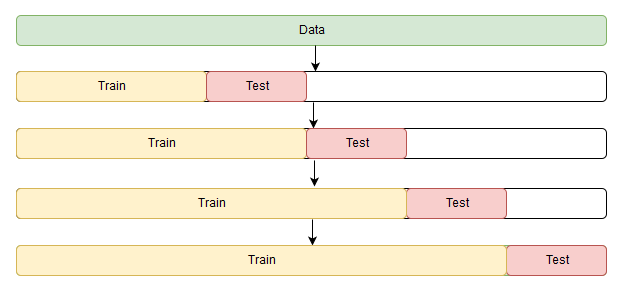

In [11]:
new_data_total_flow.shape

(2192, 26)

In [15]:
FORECAST_PERIOD = 31
data_train = new_data_total_flow.iloc[:-FORECAST_PERIOD]
data_test = new_data_total_flow.iloc[-FORECAST_PERIOD:]

exp_reg101 = setup(data = data_train, 
                   test_data = data_test,
                   target = 'flux_journalier', 
                   fold_strategy = 'timeseries',
                   transform_target = True,
                   session_id=123, 
                   fold = 71) 

,Description,Value
0,session_id,123
1,Target,flux_journalier
2,Original Data,"(2161, 26)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2161, 52)"


La fonction si dessous, execute et compare 25 modèle de regression et nous affiche une grille de score.

In [16]:
best = compare_models(sort = 'MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
rf,Random Forest Regressor,30.0360,2062.8391,37.8910,0.0036,0.1503,0.1650,0.7099
et,Extra Trees Regressor,31.2158,2229.1061,39.3518,-0.1064,0.1564,0.1692,0.5244
knn,K Neighbors Regressor,42.0346,3185.0985,51.9685,-0.6435,0.1948,0.1972,0.1038
dt,Decision Tree Regressor,41.7897,3680.9390,53.8381,-1.1632,0.2294,0.1997,0.0317
ada,AdaBoost Regressor,37.2061,2937.6635,45.3950,-1.2633,0.1809,0.2092,0.1269
llar,Lasso Least Angle Regression,49.3237,4913.6128,58.3264,-3.4655,0.2219,0.2691,0.0396


Le meilleur modèle est **Random Forest Regressor** avec un taux d'erreur = **30.03%**\
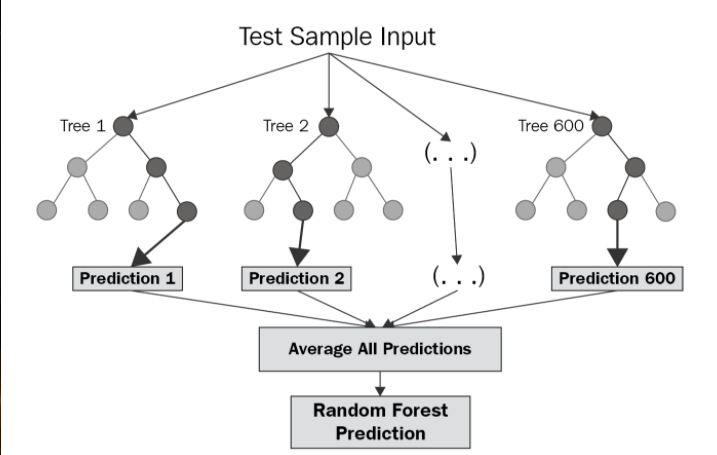

---



In [17]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,24.9016,915.2442,30.253,0.2152,0.181,0.1503


et un taux d'erreur de test = **24.9%**

Après avoir choisir le modèle de regression qui nous à donner les meilleur résultats, nous devrons le créer

In [18]:
rf = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,26.9031,1406.5471,37.5040,-0.2203,0.1250,0.0864
1,24.2698,1105.2514,33.2453,0.3652,0.1148,0.0844
2,22.9746,833.3836,28.8684,0.5784,0.0916,0.0730
3,24.1296,980.4376,31.3119,0.4895,0.1142,0.0877
4,58.5151,9623.4646,98.0993,-0.4106,0.5802,0.6188
...,...,...,...,...,...,...
68,95.6204,10744.4258,103.6553,-7.4962,0.5145,0.6385
69,29.9649,1340.2034,36.6088,-1.5900,0.2562,0.2430
70,21.6275,699.8029,26.4538,0.1249,0.1761,0.1416
Mean,30.0360,2062.8391,37.8910,0.0036,0.1503,0.1650


Cette grille affiche les scores du modèle pour chaque partie (Les 71 Folds)

In [19]:
evaluate_model(rf)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [20]:
final_rf = finalize_model(rf)

In [21]:
print(final_rf)

PowerTransformedTargetRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                                max_depth=None, max_features='auto',
                                max_leaf_nodes=None, max_samples=None,
                                min_impurity_decrease=0.0,
                                min_impurity_split=None, min_samples_leaf=1,
                                min_samples_split=2,
                                min_weight_fraction_leaf=0.0, n_estimators=100,
                                n_jobs=-1, oob_score=False,
                                power_transformer_method='box-cox',
                                power...
                                regressor=RandomForestRegressor(bootstrap=True,
                                                                ccp_alpha=0.0,
                                                                criterion='mse',
                                                                max_depth=None,
                      

Importer les données de test

In [22]:
unseen = pd.read_csv('test_data_pca_dt_covid_fi.csv')
data = unseen.drop(['CHIRURGIE',	'MEDICALE',	'ORTHOPEDIE'], axis = 1)
data = data.drop(['total_deaths_per_million', 
                   'total_deaths'], axis = 1)
data_unseen = data.iloc[:31, :]
unseen_predictions = predict_model(final_rf, data=data_unseen)
unseen_predictions.head()

,Date,flux_journalier,match,T2M_RANGE,PRECTOT,RH2M,PS,weekday,holidays,season,Ramadan,WS,WS_RANG,Temp,year,month,day,weekend,total_cases,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,new_vaccinations_smoothed_per_million,stringency_index,Label
0,2021-01-01,112.0,1.0,5.96,0.0,62.87,100.96,4.0,1.0,1.0,0.0,0.643467,-2.540361,-17.941538,2021.0,1.0,1.0,0.0,140557.0,1711.286,49.286,11892.846,144.796,4.170,0.0,71.3,146.348015
1,2021-01-02,147.0,0.0,8.02,0.0,58.45,100.78,5.0,0.0,1.0,0.0,2.773686,-3.868531,-17.723206,2021.0,1.0,2.0,1.0,141979.0,1678.429,48.429,12013.164,142.016,4.098,0.0,71.3,137.169169
2,2021-01-03,135.0,0.0,6.45,0.0,62.95,100.95,6.0,0.0,1.0,0.0,1.935177,-0.960396,-17.563890,2021.0,1.0,3.0,1.0,143544.0,1707.429,47.714,12145.583,144.469,4.037,0.0,71.3,137.674651
3,2021-01-04,163.0,0.0,7.09,0.0,58.87,101.12,0.0,0.0,1.0,0.0,3.701725,-1.157312,-22.099641,2021.0,1.0,4.0,0.0,144796.0,1656.000,49.143,12251.517,140.118,4.158,0.0,71.3,139.100155
4,2021-01-05,137.0,0.0,6.62,0.0,55.58,101.14,1.0,0.0,1.0,0.0,3.402710,-1.959483,-22.175979,2021.0,1.0,5.0,0.0,147061.0,1751.286,52.000,12443.164,148.180,4.400,0.0,71.3,139.816747


L'affichage de la prédiction du 30 jours 

In [23]:
df_real = data_unseen['flux_journalier']
df_label = unseen_predictions['Label']
result = pd.concat([df_real, df_label, df_real-df_label], axis=1)
result

,flux_journalier,Label,0
0,112.0,146.348015,-34.348015
1,147.0,137.169169,9.830831
2,135.0,137.674651,-2.674651
3,163.0,139.100155,23.899845
4,137.0,139.816747,-2.816747
5,127.0,138.931124,-11.931124
6,126.0,139.128074,-13.128074
7,143.0,141.016435,1.983565
8,144.0,147.010000,-3.010000
9,122.0,141.984201,-19.984201


In [24]:
save_model(final_rf, 'regression_model_daily_total_flow')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=[],
                                       target='flux_journalier',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_...
                                                                                  ccp_alpha=0.0,
                                                                                  criterion='mse',
                                                                              

**Load the model and predict**

In [25]:
saved_final_rf = load_model('regression_model_daily_total_flow')

Transformation Pipeline and Model Successfully Loaded


In [26]:
new_prediction = predict_model(saved_final_rf, data=data_unseen)

In [27]:
new_prediction.head()

,Date,flux_journalier,match,T2M_RANGE,PRECTOT,RH2M,PS,weekday,holidays,season,Ramadan,WS,WS_RANG,Temp,year,month,day,weekend,total_cases,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,new_vaccinations_smoothed_per_million,stringency_index,Label
0,2021-01-01,112.0,1.0,5.96,0.0,62.87,100.96,4.0,1.0,1.0,0.0,0.643467,-2.540361,-17.941538,2021.0,1.0,1.0,0.0,140557.0,1711.286,49.286,11892.846,144.796,4.170,0.0,71.3,146.348015
1,2021-01-02,147.0,0.0,8.02,0.0,58.45,100.78,5.0,0.0,1.0,0.0,2.773686,-3.868531,-17.723206,2021.0,1.0,2.0,1.0,141979.0,1678.429,48.429,12013.164,142.016,4.098,0.0,71.3,137.169169
2,2021-01-03,135.0,0.0,6.45,0.0,62.95,100.95,6.0,0.0,1.0,0.0,1.935177,-0.960396,-17.563890,2021.0,1.0,3.0,1.0,143544.0,1707.429,47.714,12145.583,144.469,4.037,0.0,71.3,137.674651
3,2021-01-04,163.0,0.0,7.09,0.0,58.87,101.12,0.0,0.0,1.0,0.0,3.701725,-1.157312,-22.099641,2021.0,1.0,4.0,0.0,144796.0,1656.000,49.143,12251.517,140.118,4.158,0.0,71.3,139.100155
4,2021-01-05,137.0,0.0,6.62,0.0,55.58,101.14,1.0,0.0,1.0,0.0,3.402710,-1.959483,-22.175979,2021.0,1.0,5.0,0.0,147061.0,1751.286,52.000,12443.164,148.180,4.400,0.0,71.3,139.816747


###Chirurgie

In [ ]:
new_data_chirurgie.head()

,CHIRURGIE,match,T2M_RANGE,PRECTOT,RH2M,PS,weekday,holidays,season,Ramadan,WS,WS_RANG,Temp,year,month,day,weekend,total_cases,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,new_vaccinations_smoothed_per_million,stringency_index
0,47.0,0,6.90,2.42,77.70,101.82,3,1,1,0,15.003801,3.585058,-26.905337,2015,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,56.0,0,5.82,0.16,72.93,102.61,4,1,1,0,6.169354,-1.408782,-23.307549,2015,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,104.0,0,8.26,0.02,75.49,102.93,5,0,1,0,2.128137,-1.542187,-20.511078,2015,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,92.0,0,11.28,0.01,66.70,102.27,6,0,1,0,5.306430,-3.315347,-18.656676,2015,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,83.0,0,6.54,0.17,75.91,102.18,0,0,1,0,7.901022,0.765738,-16.650180,2015,1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
FORECAST_PERIOD = 31
data_train = new_data_chirurgie.iloc[:-FORECAST_PERIOD]
data_test = new_data_chirurgie.iloc[-FORECAST_PERIOD:]

exp_reg101 = setup(data = data_train, 
                   test_data = data_test,
                   target = 'CHIRURGIE', 
                   fold_strategy = 'timeseries',
                   transform_target = True,
                   session_id=123, 
                   fold = 71) 

,Description,Value
0,session_id,123
1,Target,CHIRURGIE
2,Original Data,"(2161, 25)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2161, 50)"


In [ ]:
best = compare_models(sort = 'MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,13.5837,337.7456,17.3466,-0.4236,0.2303,0.2313,0.2634
lightgbm,Light Gradient Boosting Machine,14.1853,365.0617,17.9841,-0.4830,0.2369,0.2318,0.0979
et,Extra Trees Regressor,14.5451,394.5097,18.6409,-0.6570,0.2510,0.2339,0.6420
rf,Random Forest Regressor,13.8541,351.1504,17.6457,-0.4838,0.2356,0.2376,0.8548
knn,K Neighbors Regressor,15.2317,415.7443,19.3510,-0.6829,0.2540,0.2448,0.1044
dt,Decision Tree Regressor,19.1094,631.3441,24.1881,-1.8778,0.3361,0.2958,0.0255
ada,AdaBoost Regressor,16.7220,501.2057,20.4697,-2.6406,0.2776,0.3331,0.1620
llar,Lasso Least Angle Regression,17.7547,585.4886,21.4018,-3.3632,0.2883,0.3669,0.0501


In [ ]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,11.3342,190.2531,13.7932,-0.3214,0.3678,0.3036


Best regressor is Gradient Boosting Regressor with train error = **26.34%** and test error = **30.36%** 

###Medicale

In [ ]:
new_data_medicale.head()

,MEDICALE,match,T2M_RANGE,PRECTOT,RH2M,PS,weekday,holidays,season,Ramadan,WS,WS_RANG,Temp,year,month,day,weekend,total_cases,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,new_vaccinations_smoothed_per_million,stringency_index
0,75,0,6.90,2.42,77.70,101.82,3,1,1,0,15.003801,3.585058,-26.905337,2015,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,111,0,5.82,0.16,72.93,102.61,4,1,1,0,6.169354,-1.408782,-23.307549,2015,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,73,0,8.26,0.02,75.49,102.93,5,0,1,0,2.128137,-1.542187,-20.511078,2015,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,81,0,11.28,0.01,66.70,102.27,6,0,1,0,5.306430,-3.315347,-18.656676,2015,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,139,0,6.54,0.17,75.91,102.18,0,0,1,0,7.901022,0.765738,-16.650180,2015,1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
FORECAST_PERIOD = 31
data_train = new_data_medicale.iloc[:-FORECAST_PERIOD]
data_test = new_data_medicale.iloc[-FORECAST_PERIOD:]

exp_reg101 = setup(data = data_train, 
                   test_data = data_test,
                   target = 'MEDICALE', 
                   fold_strategy = 'timeseries',
                   transform_target = True,
                   session_id=123, 
                   fold = 71) 

,Description,Value
0,session_id,123
1,Target,MEDICALE
2,Original Data,"(2161, 25)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2161, 50)"


In [ ]:
best = compare_models(sort = 'MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,18.7267,669.6846,23.5774,-0.0265,0.2096,0.2176,0.2628
lightgbm,Light Gradient Boosting Machine,20.0419,751.9143,25.0607,-0.1795,0.2207,0.2303,0.0986
rf,Random Forest Regressor,20.0745,753.6286,25.0721,-0.1682,0.2219,0.2332,0.8948
et,Extra Trees Regressor,20.4137,777.6816,25.6341,-0.2421,0.2276,0.2363,0.6451
ada,AdaBoost Regressor,21.6406,848.1086,26.6508,-0.4716,0.2387,0.2555,0.1654
knn,K Neighbors Regressor,25.7265,1135.2169,31.7380,-0.8209,0.2754,0.2623,0.1039
dt,Decision Tree Regressor,26.2582,1200.5540,32.8361,-1.0853,0.2997,0.2811,0.0261
llar,Lasso Least Angle Regression,28.0292,1347.2352,33.5433,-2.1082,0.2944,0.3257,0.0504


In [ ]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,18.0776,499.6875,22.3537,-0.2879,0.3339,0.2413


Best regressor is Gradient Boosting Regressor with train error = **21.76	%** and test error = **24.13**

###Orthopedie

In [ ]:
new_data_orthopedie.head()

,ORTHOPEDIE,match,T2M_RANGE,PRECTOT,RH2M,PS,weekday,holidays,season,Ramadan,WS,WS_RANG,Temp,year,month,day,weekend,total_cases,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,new_vaccinations_smoothed_per_million,stringency_index
0,48.0,0,6.90,2.42,77.70,101.82,3,1,1,0,15.003801,3.585058,-26.905337,2015,1,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,82.0,0,5.82,0.16,72.93,102.61,4,1,1,0,6.169354,-1.408782,-23.307549,2015,1,2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,45.0,0,8.26,0.02,75.49,102.93,5,0,1,0,2.128137,-1.542187,-20.511078,2015,1,3,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,55.0,0,11.28,0.01,66.70,102.27,6,0,1,0,5.306430,-3.315347,-18.656676,2015,1,4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,81.0,0,6.54,0.17,75.91,102.18,0,0,1,0,7.901022,0.765738,-16.650180,2015,1,5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
FORECAST_PERIOD = 31
data_train = new_data_orthopedie.iloc[:-FORECAST_PERIOD]
data_test = new_data_orthopedie.iloc[-FORECAST_PERIOD:]

exp_reg101 = setup(data = data_train, 
                   test_data = data_test,
                   target = 'ORTHOPEDIE', 
                   fold_strategy = 'timeseries',
                   transform_target = True,
                   session_id=123, 
                   fold = 71) 

,Description,Value
0,session_id,123
1,Target,ORTHOPEDIE
2,Original Data,"(2161, 25)"
3,Missing Values,False
4,Numeric Features,16
5,Categorical Features,8
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(2161, 50)"


In [ ]:
best = compare_models(sort = 'MAPE')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lightgbm,Light Gradient Boosting Machine,14.8803,404.5877,18.5536,-0.0774,0.2207,0.2937,0.0976
gbr,Gradient Boosting Regressor,14.5012,398.1483,18.1994,-0.0416,0.2185,0.3007,0.2627
et,Extra Trees Regressor,15.1635,423.6869,19.0427,-0.1459,0.2259,0.3016,0.6438
rf,Random Forest Regressor,14.7539,408.7412,18.4118,-0.0868,0.2200,0.3031,0.8428
knn,K Neighbors Regressor,18.0070,547.6067,22.3220,-0.5611,0.2586,0.3260,0.1055
ada,AdaBoost Regressor,15.4989,454.0413,19.1924,-0.2688,0.2319,0.3287,0.1635
dt,Decision Tree Regressor,20.2878,722.8718,25.3873,-1.0826,0.3069,0.3688,0.0254
llar,Lasso Least Angle Regression,18.8549,630.1237,22.8303,-0.9237,0.2712,0.3925,0.0510


In [ ]:
prediction_holdout = predict_model(best);

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Light Gradient Boosting Machine,9.8638,176.7178,13.2935,0.0434,0.2157,0.1612


Best regressor is Light Gradient Boosting Machine with train error = **29.37%** and test error = **16.12%** 

#Tourner le modèle Random Forest et le tester sur les données du mois de

##Décembre 2020

Importer les librairies

In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor


Importer les données: (01-2015 _ 11-2020)

In [ ]:
df = pd.read_csv('data_pca_dt_covid_fi.csv')

In [ ]:
new_data = df.drop(['total_deaths_per_million', 
                   'total_deaths'], axis = 1)

new_data_total_flow = new_data.drop(['CHIRURGIE',	'MEDICALE',	'ORTHOPEDIE'], axis = 1)
new_data_chirurgie = new_data.drop(['flux_journalier',	'MEDICALE',	'ORTHOPEDIE'], axis = 1)
new_data_orthopedie = new_data.drop(['flux_journalier', 'CHIRURGIE',	'MEDICALE'], axis = 1)
new_data_medicale = new_data.drop(['flux_journalier', 'CHIRURGIE',	'ORTHOPEDIE'], axis = 1)

split data (31 for test-forecast)

In [ ]:
X = new_data_total_flow.iloc[:,2:]
y = new_data_total_flow['flux_journalier']

FORECAST_PERIOD = 31
X_train = X.iloc[:-FORECAST_PERIOD,:]
X_test = X.iloc[-FORECAST_PERIOD:,:]
y_train = y.iloc[:-FORECAST_PERIOD]
y_test =  y.iloc[-FORECAST_PERIOD:]
print('X_train: ', X_train.shape, '\n X_test: ', X_test.shape, '\n y_train', y_train.shape, '\n y_test', y_test.shape)

X_train:  (2161, 24) 
 X_test:  (31, 24) 
 y_train (2161,) 
 y_test (31,)


run the model

In [ ]:
rf = RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=123, verbose=0)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

predict

In [ ]:
predictions = rf.predict(X_test)

In [ ]:
import numpy as np
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: 25.03


mae = 25.03

In [ ]:
results = y_test.reset_index()
results.insert(2, 'predictions', predictions)
results.insert(3, 'différence', results['predictions']-results['flux_journalier'])

results = results.iloc[:,1:]
results

,flux_journalier,predictions,différence
0,182,176.649155,-5.350845
1,148,163.069877,15.069877
2,164,166.827643,2.827643
3,176,146.889191,-29.110809
4,158,143.028117,-14.971883
5,111,114.980124,3.980124
6,217,162.017261,-54.982739
7,106,161.040438,55.040438
8,176,167.377235,-8.622765
9,169,158.855978,-10.144022


upload a new data

In [ ]:
test_df = pd.read_csv('test_data_pca_dt_covid_fi.csv')

In [ ]:
test_df = test_df.drop(['total_deaths_per_million', 
                   'total_deaths'], axis = 1)

test_df = test_df.drop(['CHIRURGIE',	'MEDICALE',	'ORTHOPEDIE'], axis = 1)

split data into months

In [ ]:
janvier = test_df.iloc[:31,:]
fevrier =  test_df.iloc[31:59,:]
mars = test_df.iloc[59:90,:]
avril = test_df.iloc[90:120,:]
mai = test_df.iloc[120:151,:]
juin = test_df.iloc[151:,:]

In [ ]:
X_janvier = janvier.iloc[:,2:]
y_janvier = janvier['flux_journalier']
X_fevrier = fevrier.iloc[:,2:]
y_fevrier = fevrier['flux_journalier']
X_mars = mars.iloc[:,2:]
y_mars = mars['flux_journalier']
X_avril = avril.iloc[:,2:]
y_avril = avril['flux_journalier']
X_mai = mai.iloc[:,2:]
y_mai = mai['flux_journalier']
X_juin = juin.iloc[:,2:]
y_juin = juin['flux_journalier']

##Janvier 2021

In [ ]:
rf = RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=123, verbose=0)
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [ ]:
predictions = rf.predict(X_janvier)

In [ ]:
import numpy as np
# Calculate the absolute errors
errors = abs(predictions - y_janvier)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))


Mean Absolute Error: 17.71


mae 17.71

In [ ]:
results = y_janvier.reset_index()
results.insert(2, 'predictions', predictions)
results.insert(3, 'différence', results['predictions']-results['flux_journalier'])

results = results.iloc[:,1:]
results

,flux_journalier,predictions,différence
0,112.0,153.768392,41.768392
1,147.0,153.806091,6.806091
2,135.0,119.923632,-15.076368
3,163.0,166.175853,3.175853
4,137.0,163.452297,26.452297
5,127.0,159.799104,32.799104
6,126.0,158.533961,32.533961
7,143.0,158.203422,15.203422
8,144.0,152.974171,8.974171
9,122.0,120.120140,-1.879860


##Février 2021

In [ ]:
data = pd.concat([new_data_total_flow, janvier], ignore_index = True)
data.tail()

,Date,flux_journalier,match,T2M_RANGE,PRECTOT,RH2M,PS,weekday,holidays,season,Ramadan,WS,WS_RANG,Temp,year,month,day,weekend,total_cases,new_cases_smoothed,new_deaths_smoothed,total_cases_per_million,new_cases_smoothed_per_million,new_deaths_smoothed_per_million,new_vaccinations_smoothed_per_million,stringency_index
2218,2021-01-27,159.0,0.0,8.46,0.00,66.22,101.74,2.0,0.0,1.0,0.0,-0.491839,-1.499057,-14.102575,2021.0,1.0,27.0,0.0,202323.0,1992.857,75.000,17119.007,168.620,6.346,0.0,79.63
2219,2021-01-28,184.0,0.0,6.93,0.00,76.08,101.63,3.0,0.0,1.0,0.0,-1.370595,4.338525,-5.190099,2021.0,1.0,28.0,0.0,204351.0,1923.857,74.143,17290.600,162.782,6.273,0.0,79.63
2220,2021-01-29,155.0,0.0,10.81,0.00,66.61,101.39,4.0,0.0,1.0,0.0,4.736063,-1.982295,-3.800702,2021.0,1.0,29.0,0.0,206030.0,1822.429,72.429,17432.664,154.200,6.128,0.0,79.63
2221,2021-01-30,163.0,0.0,10.56,0.00,59.57,100.74,5.0,0.0,1.0,0.0,3.933174,1.580732,-3.654114,2021.0,1.0,30.0,1.0,207468.0,1736.286,75.143,17554.337,146.911,6.358,0.0,79.63
2222,2021-01-31,118.0,2.0,6.32,0.04,61.19,100.12,6.0,0.0,1.0,0.0,2.896596,-2.065500,-7.881861,2021.0,1.0,31.0,1.0,208885.0,1644.571,74.286,17674.232,139.151,6.285,0.0,79.63


In [ ]:
X = data.iloc[:,2:]
y = data['flux_journalier']

In [ ]:
rf = RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=123, verbose=0)
rf.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=8, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=123, verbose=0, warm_start=False)

In [ ]:
predictions = rf.predict(X_fevrier)

In [ ]:
import numpy as np
# Calculate the absolute errors
errors = abs(predictions - y_fevrier)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 45.22


In [ ]:
results = y_fevrier.reset_index()
results.insert(2, 'predictions', predictions)
results.insert(3, 'différence', results['predictions']-results['flux_journalier'])
results = results.iloc[:,1:]
results

,flux_journalier,predictions,différence
0,219.0,163.202930,-55.797070
1,214.0,155.113686,-58.886314
2,174.0,154.669895,-19.330105
3,191.0,144.641900,-46.358100
4,185.0,144.789576,-40.210424
5,155.0,141.723356,-13.276644
6,136.0,119.754465,-16.245535
7,238.0,160.748279,-77.251721
8,200.0,158.228837,-41.771163
9,202.0,158.336963,-43.663037


##Mars 2021

In [ ]:
data = pd.concat([data, fevrier], ignore_index = True)
X = data.iloc[:,2:]
y = data['flux_journalier']
rf = RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=123, verbose=0)
rf.fit(X, y)

predictions = rf.predict(X_mars)

import numpy as np
# Calculate the absolute errors
errors = abs(predictions - y_mars)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 34.51


In [ ]:
results = y_mars.reset_index()
results.insert(2, 'predictions', predictions)
results.insert(3, 'différence', results['predictions']-results['flux_journalier'])
results = results.iloc[:,1:]
results

,flux_journalier,predictions,différence
0,288.0,216.275978,-71.724022
1,196.0,216.872895,20.872895
2,228.0,212.518423,-15.481577
3,215.0,208.669002,-6.330998
4,206.0,198.760929,-7.239071
5,199.0,183.848187,-15.151813
6,185.0,173.088548,-11.911452
7,258.0,218.292881,-39.707119
8,230.0,205.047323,-24.952677
9,222.0,201.234036,-20.765964


##Avril 2021

In [ ]:
data = pd.concat([data, mars], ignore_index = True)
X = data.iloc[:,2:]
y = data['flux_journalier']
rf = RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=123, verbose=0)
rf.fit(X, y)

predictions = rf.predict(X_avril)

import numpy as np
# Calculate the absolute errors
errors = abs(predictions - y_avril)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 31.33


In [ ]:
results = y_avril.reset_index()
results.insert(2, 'predictions', predictions)
results.insert(3, 'différence', results['predictions']-results['flux_journalier'])
results = results.iloc[:,1:]
results

,flux_journalier,predictions,différence
0,252.0,234.281921,-17.718079
1,243.0,210.185849,-32.814151
2,246.0,193.147391,-52.852609
3,182.0,170.915630,-11.084370
4,250.0,228.561560,-21.438440
5,219.0,220.237840,1.237840
6,232.0,217.423268,-14.576732
7,201.0,211.973119,10.973119
8,194.0,195.741154,1.741154
9,201.0,186.518968,-14.481032


##Mai 2021

In [ ]:
data = pd.concat([data, avril], ignore_index = True)
X = data.iloc[:,2:]
y = data['flux_journalier']
rf = RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=123, verbose=0)
rf.fit(X, y)

predictions = rf.predict(X_mai)

import numpy as np
# Calculate the absolute errors
errors = abs(predictions - y_mai)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 36.44


In [ ]:
results = y_mai.reset_index()
results.insert(2, 'predictions', predictions)
results.insert(3, 'différence', results['predictions']-results['flux_journalier'])
results = results.iloc[:,1:]
results

,flux_journalier,predictions,différence
0,118.0,150.671185,32.671185
1,105.0,151.648910,46.648910
2,161.0,183.549486,22.549486
3,162.0,173.222855,11.222855
4,154.0,174.253312,20.253312
5,163.0,178.659525,15.659525
6,150.0,167.469449,17.469449
7,142.0,158.226752,16.226752
8,111.0,145.944659,34.944659
9,175.0,175.474268,0.474268


##juin 2021

In [ ]:
data = pd.concat([data, mai], ignore_index = True)
X = data.iloc[:,2:]
y = data['flux_journalier']
rf = RandomForestRegressor(max_depth=8, n_jobs=-1, random_state=123, verbose=0)
rf.fit(X, y)

predictions = rf.predict(X_juin)

import numpy as np
# Calculate the absolute errors
errors = abs(predictions - y_juin)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 72.71


In [ ]:
results = y_juin.reset_index()
results.insert(2, 'predictions', predictions)
results.insert(3, 'différence', results['predictions']-results['flux_journalier'])
results = results.iloc[:,1:]
results

,flux_journalier,predictions,différence
0,259.0,184.478913,-74.521087
1,252.0,180.314982,-71.685018
2,240.0,181.999282,-58.000718
3,231.0,176.242979,-54.757021
4,221.0,169.363719,-51.636281
5,207.0,147.300073,-59.699927
6,287.0,189.399933,-97.600067
7,255.0,175.671873,-79.328127
8,226.0,167.628924,-58.371076
9,246.0,161.438244,-84.561756
